# Detecção de objetos e Segmentação de imagens

Modelos disponíveis:

[https://pytorch.org/vision/stable/models.html#table-of-all-available-instance-segmentation-weights](https://pytorch.org/vision/stable/models.html#table-of-all-available-instance-segmentation-weights)

In [10]:
import os
import random
import matplotlib.pyplot as plt
import torch
from torchvision.io import read_image
from torchvision.models.detection import (maskrcnn_resnet50_fpn_v2, 
                                    MaskRCNN_ResNet50_FPN_V2_Weights)
from torchvision.utils import draw_bounding_boxes

# Carrega a rede e os respectivos pesos pré-treinados
weights = MaskRCNN_ResNet50_FPN_V2_Weights.DEFAULT
model = maskrcnn_resnet50_fpn_v2(weights=weights)
model.eval()

# Categorias que a rede aceita
categories = weights.meta["categories"]
# Funções de pré-processamento para as imagens
preprocess = weights.transforms()
print(categories)

['__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


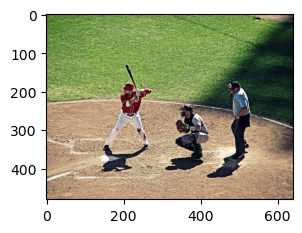

In [2]:
img = read_image("beisebol.jpg")
# No Pytorch a primeira dimensão representa as cores, o permute transfere as cores para a última dimensão
plt.imshow(img.permute(1, 2, 0))

In [3]:
batch = preprocess(img)[None]
with torch.no_grad():
    prediction = model(batch)[0]
# A rede retorna um dicionário com as seguintes chaves:
# 'boxes': bounding box de cada objeto encontrado. Cada bounding box é descrita por
#          4 valores, que representam a posição do canto esquerdo superior e o canto
#          direito inferior da caixa
# 'labels': A classe do objeto encontrado segundo o atributo `categories` do modelo
# 'scores': A probabilidade do objeto ser da classe indicada
# 'masks': Para cada objeto, é retornada uma imagem contendo, para cada pixel, a probabilidade
#          do pixel pertencer ao objeto
print(prediction)

{'boxes': tensor([[464.0371, 173.0580, 531.8802, 375.4592],
        [334.2245, 233.7260, 423.4353, 381.7117],
        [147.6233, 177.8157, 274.0283, 369.4187],
        [335.6922, 273.9676, 364.2823, 309.7349],
        [204.3615, 130.4727, 241.1014, 210.4004],
        [229.4588, 192.3561, 246.9998, 218.2061],
        [242.9759, 191.7713, 274.4151, 211.9413],
        [334.9583, 319.4287, 355.3137, 344.1145],
        [335.5824, 273.7303, 353.0602, 303.4059],
        [344.4712, 240.1052, 361.6709, 272.0796],
        [228.3097, 191.6513, 264.8566, 219.3155]]), 'labels': tensor([ 1,  1,  1, 40, 39, 40, 40, 40, 40, 40, 40]), 'scores': tensor([0.9996, 0.9995, 0.9994, 0.9925, 0.9884, 0.2836, 0.2379, 0.2221, 0.1649,
        0.1190, 0.0957]), 'masks': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  

In [4]:
def print_prediction(categories, prediction):
    '''Função para imprimir as categorias e as respectivas probabilidades'''

    labels = prediction['labels']
    scores = prediction['scores']
    for i in range(10):
        print(f'{categories[labels[i]]}: {scores[i]:.2}')

print_prediction(categories, prediction)

person: 1.0
person: 1.0
person: 1.0
baseball glove: 0.99
baseball bat: 0.99
baseball glove: 0.28
baseball glove: 0.24
baseball glove: 0.22
baseball glove: 0.16
baseball glove: 0.12


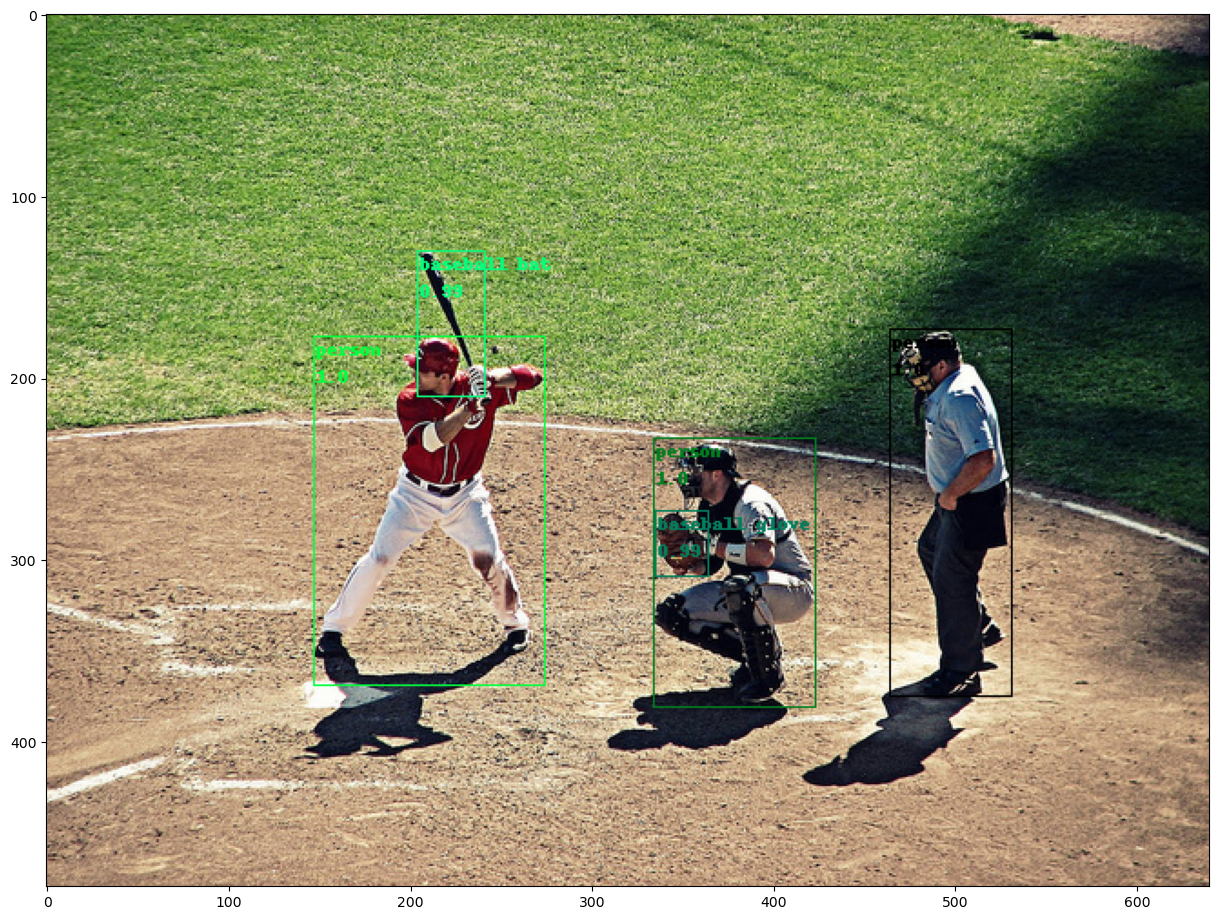

In [5]:
def draw_predictions(categories, prediction):
    '''Função que mostra os objetos detectados'''

    num_objs = 5
    labels = prediction['labels'][:num_objs]
    scores = prediction['scores'][:num_objs]
    boxes = prediction['boxes'][:num_objs]
    
    classes = []
    for i in range(num_objs):
        classes.append(f'{categories[labels[i]]}\n{scores[i]:.2}')

    img_pred = draw_bounding_boxes(img, boxes, classes)
    
    return img_pred

img_pred = draw_predictions(categories, prediction)
plt.figure(figsize=(15,15))
plt.imshow(img_pred.permute(1, 2, 0))

# Segmentação

In [6]:
# Imagens de probabilidades dos 5 objetos com maior probabilidade de estarem na imagem
masks = prediction['masks'][:5]

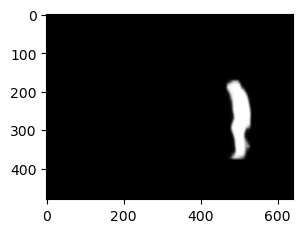

In [7]:
# As imagens retornadas não são binárias, elas possuem, para cada pixel, a probabilidade
# do pixel pertencer ao objeto
plt.imshow(masks[0][0], 'gray')

In [8]:
torch.unique(masks[0][0])

tensor([0.0000e+00, 3.1776e-06, 6.8441e-06,  ..., 9.9986e-01, 9.9986e-01,
        9.9986e-01])

<Figure size 320x240 with 0 Axes>

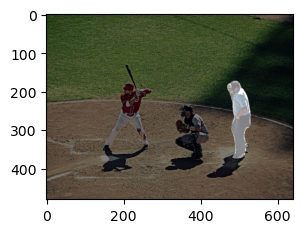

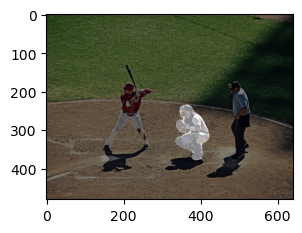

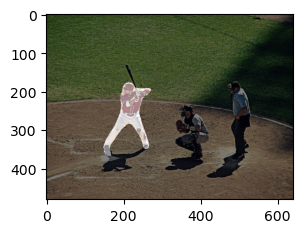

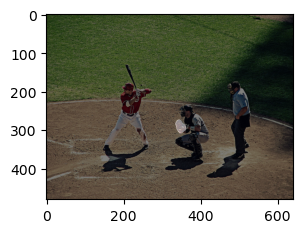

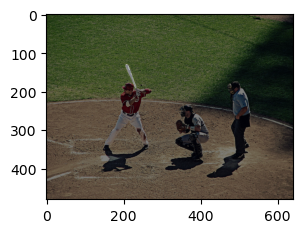

In [9]:
def draw_masks(masks, img, alpha = 0.5):
    
    # Vamos manter apenas pixeis com probabilidade maior que 0.5
    # de pertencer ao objeto
    bin_masks = masks>0.5

    for bin_mask in bin_masks:

        # alpha blending
        img_view = (1-alpha)*img.float() + alpha*255*bin_mask.float()
        img_view = img_view.int()

        plt.figure()
        plt.imshow(img_view.permute(1, 2, 0))


plt.figure()
draw_masks(masks, img)